In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [6]:
hist_path = "output/histories"

df = pd.read_csv(hist_path)
names = [name.lstrip("# ") for name in df.columns]
names = [n for n in names[0].split("\t") if n!=""]
names

['Cn',
 'Etot',
 'Zm',
 'elastPotential',
 'exx',
 'eyy',
 'ezz',
 'gravWork',
 'i',
 'kinetic',
 'n0',
 'n1',
 'nonviscDamp',
 'plastDissip',
 'sxx',
 'syy',
 'szz',
 'unbalanced',
 'velGradWork']

In [7]:
df = pd.read_csv(hist_path, sep='\t', skiprows=1, header=None, names=names)
df["qd"] = -(df["szz"] - (df["sxx"] +  df["syy"])/2)
df["pm"] = -(df["sxx"] +  df["syy"] + df["szz"])/3
df["evol"] = df["exx"] + df["eyy"] + df["ezz"]

In [8]:
results_dict = {"yade-dem":df}

[None]

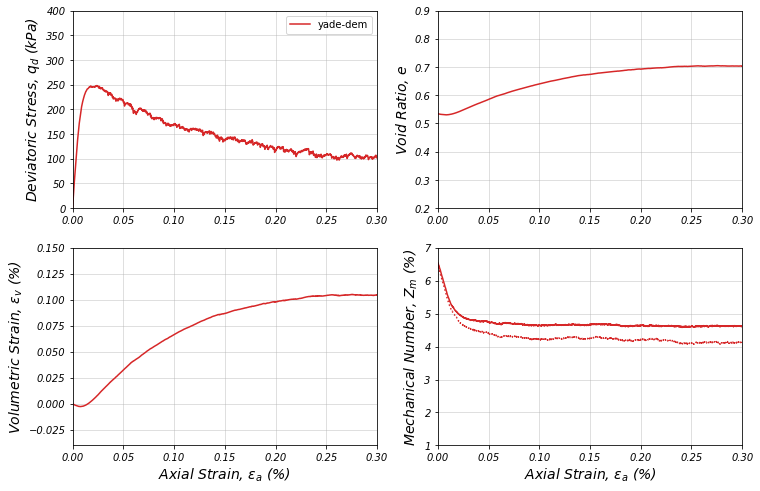

In [9]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(12,8))
ax = ax.flatten()

fs = 14
fs_tick = 10
fw = 'normal'
fsty = 'italic'

colors = ['tab:red', 'tab:blue', 'tab:green']
lsty = ['-', '--', '-.']

for l, c, name in zip(lsty, colors, results_dict):
    
    idx = np.argmax(np.abs(np.diff(df.ezz))) + 1
    
    ax[0].plot(-results_dict[name]["ezz"][idx:], results_dict[name]["qd"][idx:]/1e3, l, c=c, label=name)
    e = (results_dict[name]["n0"][idx:]/(1-results_dict[name]["n0"][idx:]))
    ax[1].plot(-results_dict[name]["ezz"][idx:], e, l, c=c)
    ax[2].plot(-results_dict[name]["ezz"][idx:], results_dict[name]["evol"][idx:], l, c=c)
    ax[3].plot(-results_dict[name]["ezz"][idx:], results_dict[name]["Zm"][idx:], l, c=c)
    ax[3].plot(-results_dict[name]["ezz"][idx:], results_dict[name]["Cn"][idx:], ':', c=c)
    
[a.set_xlim(left=0, right=0.3) for a in ax]
ax[0].legend()
ax[0].set_ylim(0, 400)
ax[1].set_ylim(0.2, 0.9)
ax[2].set_ylim(-0.04, 0.15)
ax[3].set_ylim(1, 7)
[a.grid(which='both',alpha=0.5) for a in ax]

[a.set_xlabel("Axial Strain, $\epsilon_{a}$ (%)", fontsize=fs, fontweight=fw, fontstyle=fsty) for a in ax[2:]]
ax[0].set_ylabel("Deviatoric Stress, $q_d$ (kPa)", fontsize=fs, fontweight=fw, fontstyle=fsty)
ax[1].set_ylabel("Void Ratio, $e$", fontsize=fs, fontweight=fw, fontstyle=fsty)
ax[2].set_ylabel("Volumetric Strain, $\epsilon_{v}$ (%)", fontsize=fs, fontweight=fw, fontstyle=fsty)
ax[3].set_ylabel("Mechanical Number, $Z_{m}}$ (%)", fontsize=fs, fontweight=fw, fontstyle=fsty)

# Set tick label font styling
for a in ax:
    for label in (a.get_xticklabels() + a.get_yticklabels()):
        label.set_fontsize(fs_tick)
        label.set_fontstyle(fsty)

[plt.savefig(fname="plot", bbox_inches='tight', dpi=300, ext=ext) for ext in ["svg"]]

In [10]:
df_spheres = pd.read_csv("output/sphere_coordinates", sep='\t', skiprows=1, names=['x','y','z','r'])

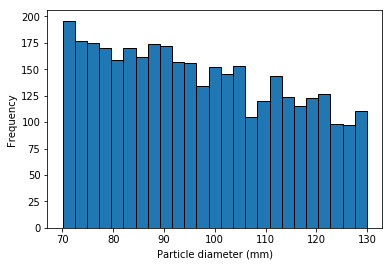

In [38]:
fig, ax = plt.subplots()
ax.hist(2*df_spheres['r']*1e3, bins=25, ec='k')
plt.ylabel('Frequency')
plt.xlabel('Particle diameter (mm)')
plt.show()

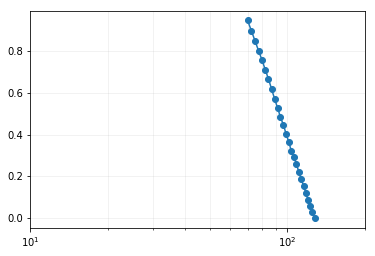

In [89]:
freq, diams = np.histogram(df_spheres['r']*2*1e3, bins=25)
plt.semilogx(diams[:-1], (3617-np.cumsum(freq))/3617, 'o-')
plt.xlim(10,200)
plt.grid(which='both', alpha=0.2)